# Taller Modelos Supervisados

In [1]:
import pip as pip
import pandas as pd             
import numpy as np     
import scipy as sp
import matplotlib.pyplot as plt 
import sklearn


In [2]:
df=pd.read_csv('C:/Users/jsszv/Downloads/aguacates.csv')
print(df)

            date          type  year  avg_price         size     nb_sold
0     2015-12-27  conventional  2015       0.95        small  9626901.09
1     2015-12-20  conventional  2015       0.98        small  8710021.76
2     2015-12-13  conventional  2015       0.93        small  9855053.66
3     2015-12-06  conventional  2015       0.89        small  9405464.36
4     2015-11-29  conventional  2015       0.99        small  8094803.56
...          ...           ...   ...        ...          ...         ...
1009  2018-02-04       organic  2018       1.53  extra_large     1703.52
1010  2018-01-28       organic  2018       1.61  extra_large     1270.61
1011  2018-01-21       organic  2018       1.63  extra_large     1490.02
1012  2018-01-14       organic  2018       1.59  extra_large     1580.01
1013  2018-01-07       organic  2018       1.51  extra_large     1289.07

[1014 rows x 6 columns]


In [3]:
from scipy.stats import t, chi2

datos = df[(df['size'] == 'small')].nb_sold

# Nivel de confianza deseado (en porcentaje)
confianza_porcentaje = 95

# Calcular la media y el tamaño de la muestra
media_muestra = np.mean(datos)
n = len(datos)

# Calcular el error estándar de la media
error_estandar = np.std(datos, ddof=1) / np.sqrt(n)

# Calcular el intervalo de confianza utilizando la distribución t de Student
intervalo_confianza = t.interval(confianza_porcentaje / 100, df = n - 1, \
                                 loc=media_muestra, scale=error_estandar)

# Imprimir los resultados
#print(f"Media de la muestra: {media_muestra:.2f}")
print(f"Intervalo de confianza al {confianza_porcentaje}%: ({intervalo_confianza[0]:.2f}, {intervalo_confianza[1]:.2f})")

Intervalo de confianza al 95%: (5417308.90, 6742077.09)


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

 

# Datos de ejemplo (variables independientes X y variable dependiente y)
X = np.array(df['nb_sold']).reshape(-1, 1) # variable independiente 
y = np.array(df['avg_price'])              # variable dependiente

 
# Crear el modelo de regresión lineal

# Y = Bo + B1x + e 
# confiabilidad del modelo en 95% (1-0.05)
# alpha del 5% (error)

# B0 intercepto
# B1 coeficiente_angular
 
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)


# Obtener los coeficientes de la regresión
coeficiente_angular = modelo.coef_[0]
intercepto = modelo.intercept_


# Imprimir los coeficientes de la regresión
print("Coeficiente angular:", coeficiente_angular)
print("Intercepto:", intercepto)


# Y = 1.45 -3.199459248338053e-08X
#

Coeficiente angular: -3.199459248338053e-08
Intercepto: 1.4523699035391395


In [5]:
##Predecir valores nuevos datos

nuevos_datos = np.array(df['nb_sold']).reshape(-1,1)
predicciones = modelo.predict(nuevos_datos)
fitrg = pd.DataFrame({'fit':predicciones,
                             'avg_price':df['avg_price'],
                             'error':(df['avg_price'] - predicciones). round(2)
 })

fitrg.head(5)

,fit,avg_price,error
0,1.144361,0.95,-0.19
1,1.173696,0.98,-0.19
2,1.137061,0.93,-0.21
3,1.151446,0.89,-0.26
4,1.193380,0.99,-0.20


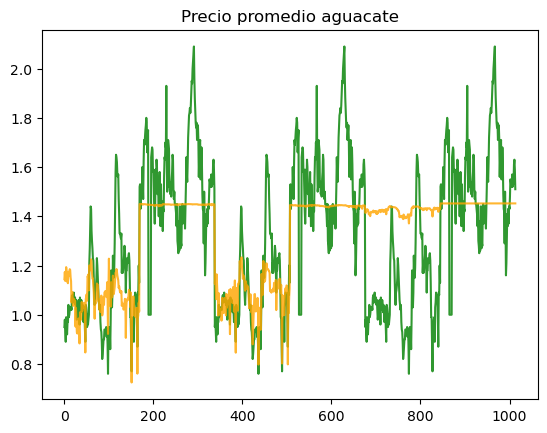

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.array(fitrg.avg_price), '-', c='green', alpha=0.81)
plt.plot(np.array(fitrg.fit), '-', c= 'orange', alpha=0.81)
plt.title('Precio promedio aguacate')
plt.show()

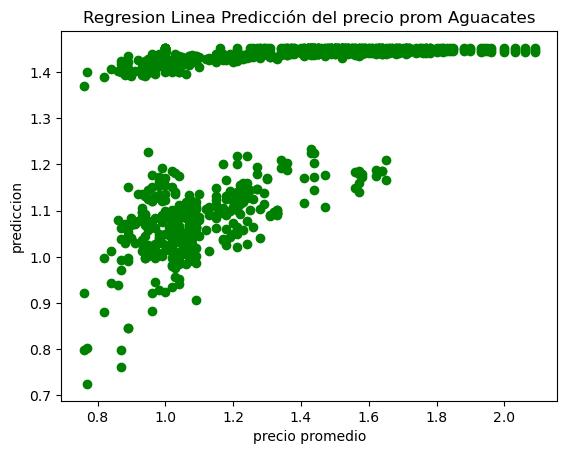

In [7]:
import matplotlib.pyplot as plt

plt.scatter(np.array(fitrg.avg_price), np.array(fitrg.fit), c = 'green')
plt.title('Regresion Linea Predicción del precio prom Aguacates')
plt.xlabel('precio promedio')
plt.ylabel('prediccion')
plt.show()

In [8]:
fitrg.corr()

,fit,avg_price,error
fit,1.000000,0.606595,0.001166
avg_price,0.606595,1.000000,0.795665
error,0.001166,0.795665,1.000000


In [9]:
from sklearn.metrics import *
mse = mean_squared_error(fitrg.avg_price, fitrg.fit).round(5)
print(' Raiz Cuadrado medio de error %'+str(np.sqrt(mse).round(2)),\
      'corresponde a la prediccion de la dispersion')
r2= r2_score(fitrg.avg_price, fitrg.fit). round(3)
print('r2 de ajuste del modelo %'+str(r2*100), \
      'ajuste de bondad del modelo en funcion de los datos originales') 
mape= mean_absolute_percentage_error(fitrg.avg_price, fitrg.fit).round(5)
print('el mape mean absolute percentage error %'+str(mape*100))



 Raiz Cuadrado medio de error %0.23 corresponde a la prediccion de la dispersion
r2 de ajuste del modelo %36.8 ajuste de bondad del modelo en funcion de los datos originales
el mape mean absolute percentage error %14.329


# Gradient Boosting

In [10]:
from sklearn.ensemble import*

gb_regressor = GradientBoostingRegressor(random_state=1988)

x = np.array(df['nb_sold']).reshape(-1, 1) # Variable independiente
y = np.array(df['avg_price'])              # Variable dependiente

# Entrenar el modelo
gb_regressor.fit(X,y)

#Realizar predicciones en el conjunto de prueba
y_pred=gb_regressor.predict(X)


In [11]:
nuevos_datos   = np.array(df ['nb_sold']).reshape(-1, 1)
prediccionesgb = gb_regressor.predict (nuevos_datos)
fitgb = pd.DataFrame( {'fit':prediccionesgb,
                      'avg_price':df['avg_price'],
                      'error':df['avg_price']- prediccionesgb
                     })
fitgb.head(3)

,fit,avg_price,error
0,1.192251,0.95,-0.242251
1,1.282801,0.98,-0.302801
2,1.079719,0.93,-0.149719


<function matplotlib.pyplot.show(close=None, block=None)>

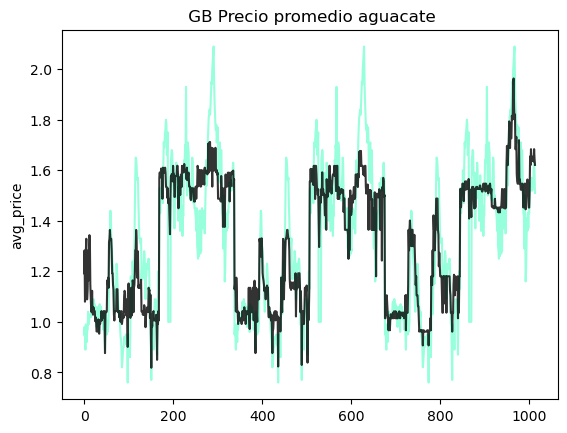

In [17]:

plt.plot(np.array(fitgb.avg_price), '-', c= '#7FFFD4', alpha = 0.8)
plt.plot(np.array(fitgb.fit), '-', c= '#000000', alpha = 0.8)
plt.title(' GB Precio promedio aguacate')
plt.ylabel('avg_price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

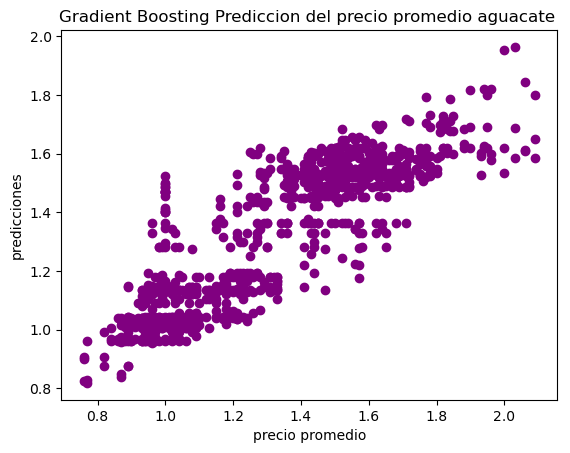

In [13]:
plt.scatter(np.array(fitgb.avg_price), np.array(fitgb.fit), c='purple')
plt.title('Gradient Boosting Prediccion del precio promedio aguacate ')
plt.xlabel('precio promedio')
plt.ylabel('predicciones')
plt.show

In [14]:
fitgb.corr()

,fit,avg_price,error
fit,1.000000,0.871062,0.084567
avg_price,0.871062,1.000000,0.563077
error,0.084567,0.563077,1.000000


In [15]:
from sklearn.metrics import*

mse = mean_squared_error(fitgb.avg_price, fitgb.fit)
print('Raiz cuadrado medio error (rmse)'+str(np.sqrt(mse).round(2)))

r2 = r2_score(fitgb.avg_price, fitgb.fit).round(2)
print('R2 de ajustes del modelo %'+str(r2*100))

mape = mean_absolute_percentage_error(fitgb.avg_price, fitgb.fit).round(2)
print('El MAPE(mean absolute percentage error %'+str(mape*100))

Raiz cuadrado medio error (rmse)0.15
R2 de ajustes del modelo %76.0
El MAPE(mean absolute percentage error %8.0


# Randon Forest

In [18]:
rf_regresor = RandomForestRegressor(random_state=1988)

X = np.array(df['nb_sold']).reshape(-1,1) #Variable independiente
y = np.array(df['avg_price']) #Variable dependiente

#Entrenar el modelo
rf_regresor.fit(X,y)

#Realizar predicciones en el conjunto de pruebas
y_pred = rf_regresor.predict(X)

In [19]:
nuevos_datos = np.array(df['nb_sold']).reshape(-1,1)
prediccionesrf = rf_regresor.predict(nuevos_datos)
fitrf          = pd.DataFrame({'fit':prediccionesrf,
                              'avg_price': df['avg_price'],
                              'error': (df['avg_price'] - prediccionesrf)
                    })
fitrf.head(3)

,fit,avg_price,error
0,1.0944,0.95,-0.1444
1,1.0510,0.98,-0.0710
2,0.9863,0.93,-0.0563


In [20]:
fitrf.corr()

,fit,avg_price,error
fit,1.000000,0.967583,0.217450
avg_price,0.967583,1.000000,0.456912
error,0.217450,0.456912,1.000000


In [21]:

mse = mean_squared_error(fitrf.avg_price, fitrf.fit)
print('Raiz cuadrado medio error (rmse)'+str(np.sqrt(mse).round(2)))

r2 = r2_score(fitrf.avg_price, fitrf.fit).round(2)
print('R2 de ajustes del modelo %'+str(r2*100))

mape = mean_absolute_percentage_error(fitrf.avg_price, fitrf.fit).round(2)
print('El MAPE(mean absolute percentage error %'+str(mape*100))

Raiz cuadrado medio error (rmse)0.08
R2 de ajustes del modelo %93.0
El MAPE(mean absolute percentage error %4.0


<function matplotlib.pyplot.show(close=None, block=None)>

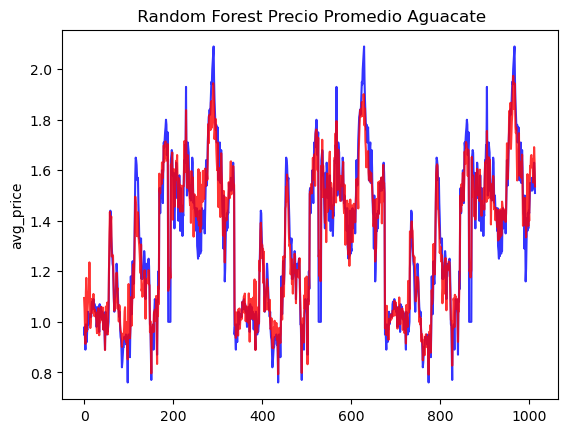

In [23]:

plt.plot(np.array(fitrf.avg_price), '-', c= 'blue', alpha = 0.8)
plt.plot(np.array(fitrf.fit), '-', c= 'red', alpha = 0.8)
plt.title(' Random Forest Precio Promedio Aguacate')
plt.ylabel('avg_price')
plt.show

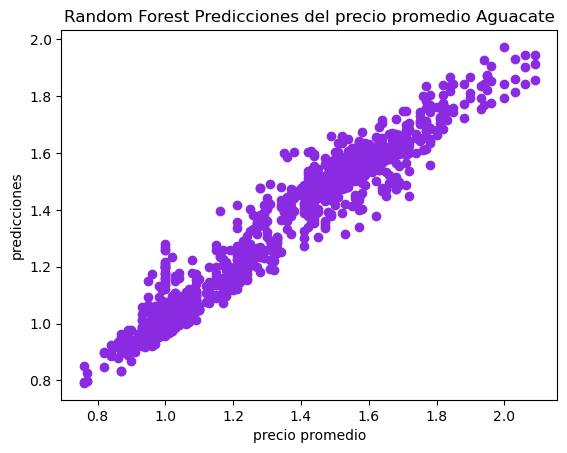

In [24]:
plt.scatter(np.array(fitrf.avg_price), np.array(fitrf.fit), c = '#8A2BE2' )
plt.title('Random Forest Predicciones del precio promedio Aguacate')
plt.xlabel('precio promedio')
plt.ylabel('predicciones')
plt.show()

# Adaboost

In [26]:
ad_regresor = AdaBoostRegressor(random_state=1988)

X = np.array(df['nb_sold']).reshape(-1,1) #Variable independiente
y = np.array(df['avg_price']) #Variable dependiente

#Entrenar el modelo
ad_regresor.fit(X,y)

#Realizar predicciones en el conjunto de pruebas
y_pred = ad_regresor.predict(X)

nuevos_datos = np.array(df['nb_sold']).reshape(-1,1)
prediccionesad = ad_regresor.predict(nuevos_datos)
fitad          = pd.DataFrame({'fit':prediccionesad,
                              'avg_price': df['avg_price'],
                              'error': (df['avg_price'] - prediccionesad)
                    })
fitad.head(3)

,fit,avg_price,error
0,1.206024,0.95,-0.256024
1,1.292652,0.98,-0.312652
2,1.109531,0.93,-0.179531


In [27]:
fitad.corr()

,fit,avg_price,error
fit,1.000000,0.823558,0.122156
avg_price,0.823558,1.000000,0.663587
error,0.122156,0.663587,1.000000


In [28]:

mse = mean_squared_error(fitad.avg_price, fitad.fit)
print('Raiz cuadrado medio error (rmse)'+str(np.sqrt(mse).round(2)))

r2 = r2_score(fitad.avg_price, fitad.fit).round(2)
print('R2 de ajustes del modelo %'+str(r2*100))

mape = mean_absolute_percentage_error(fitad.avg_price, fitad.fit).round(2)
print('El MAPE(mean absolute percentage error %'+str(mape*100))

Raiz cuadrado medio error (rmse)0.17
R2 de ajustes del modelo %67.0
El MAPE(mean absolute percentage error %10.0


<function matplotlib.pyplot.show(close=None, block=None)>

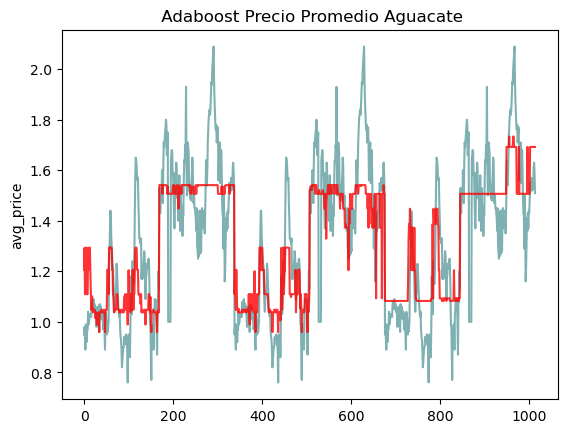

In [30]:

plt.plot(np.array(fitad.avg_price), '-', c= '#5F9EA0', alpha = 0.8)
plt.plot(np.array(fitad.fit), '-', c= 'red', alpha = 0.8)
plt.title(' Adaboost Precio Promedio Aguacate')
plt.ylabel('avg_price')
plt.show

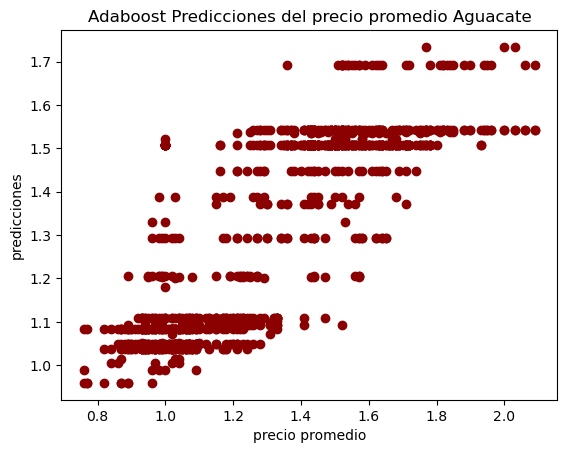

In [32]:
plt.scatter(np.array(fitad.avg_price), np.array(fitad.fit), c = '#8B0000' )
plt.title('Adaboost Predicciones del precio promedio Aguacate')
plt.xlabel('precio promedio')
plt.ylabel('predicciones')
plt.show()

Se generan los modelos Supervisados Gradient Boosting, Randon Forest y Adaboost con semilla numero 1988. Dado los resultados de cada uno de los modelos acontinuación, esto al momento de anañizar resuñtados designamos el modelo que cumple con los ajustes del analisis a realizar:

Gradient Boostin
Raiz cuadrado medio error (rmse)0.08
R2 de ajustes del modelo %93.0
El MAPE(mean absolute percentage error %4.0

Randon Forest
Raiz cuadrado medio error (rmse)0.08
R2 de ajustes del modelo %93.0
El MAPE(mean absolute percentage error %4.0

Adaboost
Raiz cuadrado medio error (rmse)0.17
R2 de ajustes del modelo %67.0
El MAPE(mean absolute percentage error %10.0

Al nalizar los resultados con la semilla indicada inicialmente que los dos primeros modelos GB y RF nos generan el mismo R2 y MAPE y raiz cuadrada media de error llevandonos a escoger cualquiera de estos dos.Pero si analizamos las tablas de correlaccion el modelo GB, nos genera mejores resultados en valor de bolsa de aguacate de un 0,87$, comparando con el RF el cual nos genera un valor por bolsa de 0.96$

